Generate ramp

mean gx ≈ 0.07000000000000002  (expect sx= 0.07 )
mean gy ≈ 0.03  (expect sy= 0.03 )


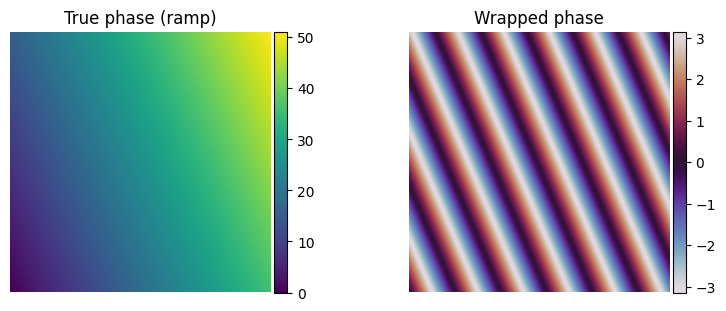

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Ny, Nx = 512, 512
sx, sy = 0.07, 0.03   # slopes in x (cols) and y (rows)

# y is axis-0 (rows), x is axis-1 (cols)
y, x = np.mgrid[0:Ny, 0:Nx]           # equivalent to meshgrid(..., indexing='ij')
phi_true = sx * x + sy * y
phi_wrap = ((phi_true + np.pi) % (2*np.pi)) - np.pi

# Verify gradients (should match sx, sy)
gy, gx = np.gradient(phi_true)        # gy=∂/∂row (y), gx=∂/∂col (x)
print("mean gx ≈", gx.mean(), " (expect sx=", sx, ")")
print("mean gy ≈", gy.mean(), " (expect sy=", sy, ")")

# Plot with consistent orientation
fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
im0 = axs[0].imshow(phi_true, cmap="viridis", origin="lower")
axs[0].set_title("True phase (ramp)")
axs[0].axis("off"); plt.colorbar(im0, ax=axs[0], fraction=0.05, pad=0.01)

im1 = axs[1].imshow(phi_wrap, cmap="twilight", origin="lower")
axs[1].set_title("Wrapped phase")
axs[1].axis("off"); plt.colorbar(im1, ax=axs[1], fraction=0.05, pad=0.01)
plt.show()



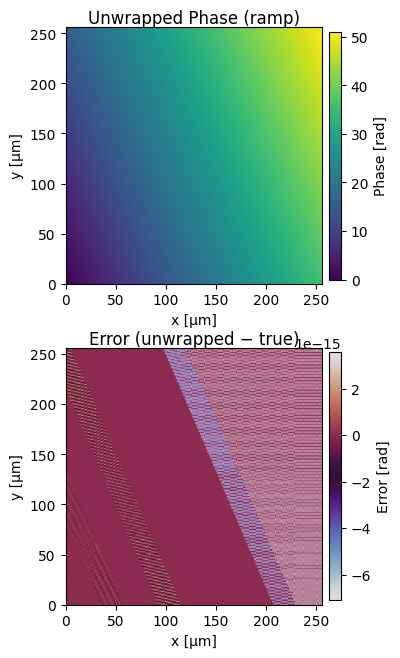

In [ ]:
from skimage.restoration import unwrap_phase
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."
from src.Ghilia.Ghilia import unwrap_phase_weighted
# unwrap
phi_unwrapped = unwrap_phase(phi_wrap)
phi_unwrapped_LS = unwrap_phase_weighted(phi_wrap)

# figure + axes
fig, axs = plt.subplots(2, 1, figsize=(4, 7.5))  # slightly smaller height
plt.subplots_adjust(hspace=0.25)  # reduce vertical gap

px, py = 0.5e-6, 0.5e-6   # example pixel sizes (meters). Replace with yours.
extent = [0, Nx*px*1e6, 0, Ny*py*1e6]  # in µm

# plot unwrapped phase
im0 = axs[0].imshow(phi_unwrapped, cmap="viridis", origin="lower",
                    extent=extent, aspect="equal")
axs[0].set_title("Unwrapped Phase (ramp)", pad=2)
axs[0].set_xlabel("x [µm]")
axs[0].set_ylabel("y [µm]")
fig.colorbar(im0, ax=axs[0], fraction=0.04, pad=0.02, label="Phase [rad]")

# plot error
err = phi_unwrapped - phi_true
im1 = axs[1].imshow(err, cmap="twilight", origin="lower",
                    extent=extent, aspect="equal")
axs[1].set_title("Error (unwrapped − true)", pad=2)
axs[1].set_xlabel("x [µm]")
axs[1].set_ylabel("y [µm]")
fig.colorbar(im1, ax=axs[1], fraction=0.04, pad=0.02, label="Error [rad]")

plt.show()


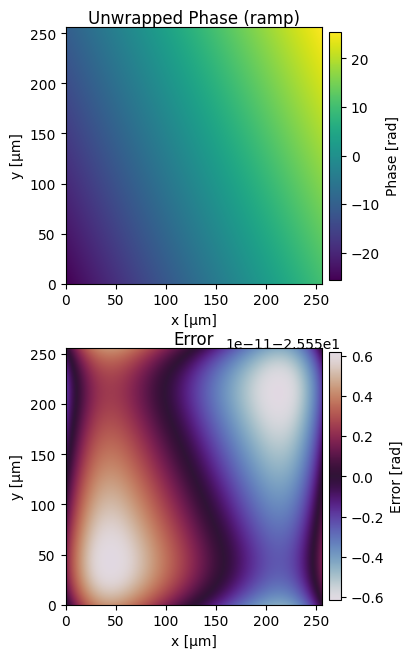